In [1]:
pip install ete3


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ete3 import Tree

Taxa Names

In [4]:
import re
def taxa_names(newick_names):
    pattern = r'([A-Za-z0-9_]+(?=:|\)))'
    
    # Find all matches of taxa names in the Newick string
    taxa_names_list = re.findall(pattern, newick_names)
    
    # Remove any taxa names containing only numbers or underscores
    taxa_names_list = [name for name in taxa_names_list if not re.match(r'^[0-9_]+$', name)]

    return taxa_names_list

In [5]:
def taxa_names_without_underscores(newick_str):

    pattern = r'([A-Za-z]+(?=_|\d|:|\)))'
    taxa_names = re.findall(pattern, newick_str)
    
    return taxa_names

In [6]:
#checking
check_taxa_names = taxa_names_without_underscores("(Afulg_0:0.538735,(Pfuri_0:0.223386,Tkoda_0:0.354236)99:0.540751,Smari_0:0.691581);")
check_taxa_names

['Afulg', 'Pfuri', 'Tkoda', 'Smari']

Triplet List

In [7]:
def triplet_list(taxas):
    triplet_list=[]
    #triplet = ""

    for i in range(len(taxas)-3+1):
        #triplet += message[i]
        triplet_tuple = (taxas[i],)
        for j in range(i+1, len(taxas)-2+1):
            triplet_tuple += (taxas[j],)
            for k in range(j+1,len(taxas)):
                triplet_tuple += (taxas[k],)
                triplet_list.append(triplet_tuple)
                #print(triplet_list)
                #triplet = triplet[:-1]
                #there is no in-built function to remove the last element of a tuple. So,
    
                #convert the tuple to a list
                combo_list = list(triplet_tuple)
                #remove the last element of the list
                combo_list.pop()
                #new tuple
                triplet_tuple = tuple(combo_list)
                
            triplet_tuple = (taxas[i],)
            #print("TL:",triplet_list)
        triplet_tuple = ()

    return triplet_list

In [8]:
#checking
check_triplet_list = triplet_list(check_taxa_names)
check_triplet_list

[('Afulg', 'Pfuri', 'Tkoda'),
 ('Afulg', 'Pfuri', 'Smari'),
 ('Afulg', 'Tkoda', 'Smari'),
 ('Pfuri', 'Tkoda', 'Smari')]

Count Matching Taxa Names with the True Species Tree

In [9]:
def count_matching_taxa_names(inferred_s_t, true_s_t):
    set1 = set(inferred_s_t)
    set2 = set(true_s_t)
    matching_count = len(set1.intersection(set2))
    return matching_count

Total Triplet Score

In [10]:
def finding_triplet_score(tree_list1,tree_list2):
    matching_triplet_list = []
    set1 = set(tree_list1)
    
    for tuple2 in tree_list2:
        if tuple2 in set1:
            matching_triplet_list.append(tuple2)

    #return matching_triplet_list
    return len(matching_triplet_list)

In [11]:
#checking
check_taxa_names2 = taxa_names_without_underscores("(Acsp_0:0.525171,(((((Bsalt_0:1.55756,Hemat_0:1.86244)43:0.252363,(Ehuxl_0:0.72489,(Osati_0:2.8504e-06,Ppate_0:0.248747)80:0.240142)35:0.067488)33:0.227491,(Chosp_0:1.09039,Cmemb_0:1.89982)11:2e-06)30:0.170641,Kbial_0:3.66901)19:3e-06,Ptetr_0:3.40644)92:0.823892,Rhete_0:0.322116);")
check_triplet_list2 = triplet_list(check_taxa_names2)
print(check_triplet_list2)
finding_triplet_score(check_taxa_names,check_taxa_names2)
#count_matching_taxa_names(check_taxa_names,check_taxa_names2)

[('Acsp', 'Bsalt', 'Hemat'), ('Acsp', 'Bsalt', 'Ehuxl'), ('Acsp', 'Bsalt', 'Osati'), ('Acsp', 'Bsalt', 'Ppate'), ('Acsp', 'Bsalt', 'Chosp'), ('Acsp', 'Bsalt', 'Cmemb'), ('Acsp', 'Bsalt', 'Kbial'), ('Acsp', 'Bsalt', 'Ptetr'), ('Acsp', 'Bsalt', 'Rhete'), ('Acsp', 'Hemat', 'Ehuxl'), ('Acsp', 'Hemat', 'Osati'), ('Acsp', 'Hemat', 'Ppate'), ('Acsp', 'Hemat', 'Chosp'), ('Acsp', 'Hemat', 'Cmemb'), ('Acsp', 'Hemat', 'Kbial'), ('Acsp', 'Hemat', 'Ptetr'), ('Acsp', 'Hemat', 'Rhete'), ('Acsp', 'Ehuxl', 'Osati'), ('Acsp', 'Ehuxl', 'Ppate'), ('Acsp', 'Ehuxl', 'Chosp'), ('Acsp', 'Ehuxl', 'Cmemb'), ('Acsp', 'Ehuxl', 'Kbial'), ('Acsp', 'Ehuxl', 'Ptetr'), ('Acsp', 'Ehuxl', 'Rhete'), ('Acsp', 'Osati', 'Ppate'), ('Acsp', 'Osati', 'Chosp'), ('Acsp', 'Osati', 'Cmemb'), ('Acsp', 'Osati', 'Kbial'), ('Acsp', 'Osati', 'Ptetr'), ('Acsp', 'Osati', 'Rhete'), ('Acsp', 'Ppate', 'Chosp'), ('Acsp', 'Ppate', 'Cmemb'), ('Acsp', 'Ppate', 'Kbial'), ('Acsp', 'Ppate', 'Ptetr'), ('Acsp', 'Ppate', 'Rhete'), ('Acsp', 'Chosp', '

0

True Species Tree

In [12]:
st_file_path = "D:\BUET\Oct'23\CSE6406(BA)\Code\Project\speciesTree.newick"
with open(st_file_path, "r") as species_file:
    st_content = species_file.read()
    st_taxa_names = taxa_names_without_underscores(st_content)

    #print(st_taxa_names)

st_triplet_list = triplet_list(st_taxa_names)
true_st = Tree(st_content)
print(len(st_triplet_list))

125580


In [13]:
finding_triplet_score(check_taxa_names,check_taxa_names2)

0

In [14]:
st_taxa_names = taxa_names_without_underscores("(Aboon:0.149941,Thvol:0.297592,(Mlumi:0.206571,((UnEury2:0.427132,TplN05:0.205343):0.033944,(((((Mpalu:0.185845,Mmaze:0.179316):0.02383,Mhung:0.271079):0.02965,(Hvolc:0.069022,Hmari:0.06328):0.286458):0.044668,Afulg:0.243975):0.056423,(((Mtherm:0.198543,Mkand:0.259391):0.039572,Mjann:0.257119):0.029345,((Tkoda:0.031304,Pfuri:0.022218):0.228893,((Kcryp:0.546456,((ThaumE09:0.455296,((Ngarg:0.096512,(Nmari:0.04935,Csymb:0.066975):0.151612):0.307674,Csubt:0.385357):0.062078):0.05576,(CrenYNPFFA:0.406052,((Tpend:0.291753,(Paero:0.159031,Cmaqu:0.164199):0.19464):0.052115,((Ssolf:0.239423,Iaggr:0.245899):0.016611,(Ihosp:0.21341,(Fervi:0.201449,(Smari:0.197422,(Hbuty:0.127527,Apern:0.188461):0.019828):0.021173):0.027997):0.017215):0.128078):0.030624):0.050629):0.047442):0.061124,(((TAB25:0.428882,OLCB4:0.253581):0.02444,Lmira:0.55703):0.023119,((HLC2:0.347977,HAB125:0.264517):0.147077,(HLC3:0.490328,((((Gthet:0.035471,Cryps:0.052556):0.101907,(Ehuxl:0.074652,Chrsp:0.058777):0.091793):0.011832,((Gsulp:0.08458,Cmero:0.144097):0.01113,(Pumbi:0.075272,Ccris:0.07617):0.024385):0.043198):0.007617,((Vcart:0.006062,Crein:0.008533):0.09459,(Ppate:0.029881,(Osati:0.024915,Atha:0.022216):0.020095):0.034124):0.04155,((((((Slemn:0.141145,(Tther:0.100284,Ptetr:0.126169):0.080824):0.048184,(Preti:0.113176,Hemat:0.088335):0.081061):0.024516,(Tclav:0.08024,((Tpseu:0.040284,Fcyli:0.053796):0.078318,(Ngadi:0.082832,Esili:0.060523):0.016105):0.015399):0.050397):0.009266,((Rfilo:0.170128,Emarg:0.093483):0.132262,(Pbras:0.128733,Bnat:0.163005):0.013038):0.030155):0.008103,(Ngrub:0.167755,((Sinca:0.148507,Bsalt:0.265211):0.012156,(Cmemb:0.22898,(((Kbial:0.114496,Dbrev:0.114287):0.079965,Ccusp:0.27457):0.05,Apalu:0.280723):0.064929):0.067948):0.014165):0.011801):0.00417,((Ttrah:0.153594,(Chosp:0.050476,(Rhete:0.056747,Acsp:0.047938):0.010248):0.069459):0.02302,((Tmari:0.145254,Cpara:0.088418):0.008887,((Nlong:0.138857,(((Mbrev:0.122374,(Sarct:0.111684,Cowcz:0.065263):0.010855):0.007674,(Lpoly:0.053812,Aqueen:0.054336):0.028445):0.020464,(Patla:0.08504,(Spunc:0.052907,(Spomb:0.119763,Amacr:0.062942):0.011684):0.025587):0.017597):0.014268):0.007425,(Ddisc:0.126622,Acast:0.083347):0.017591):0.006815):0.004677):0.002739):0.008104):1.4308):0.099478):0.075962):0.047507):0.086968):0.033934):0.073552):0.097513):0.040117):0.055975);")
st_triplet_list = triplet_list(st_taxa_names)
print(len(st_triplet_list))

125580


In [15]:
finding_triplet_score(st_triplet_list,check_taxa_names)

0

FP and FN rate for Dataset 1

In [16]:


from ete3 import Tree

def count_internal_edges(tree):

    internal_edges = 0
    for node in tree.traverse():
        if len(node.children) > 1:
            internal_edges += 1
    return internal_edges

def compare_trees(true_tree, inferred_tree):

    # Count internal edges in true and inferred trees
    true_internal_edges = count_internal_edges(true_tree)
    inferred_internal_edges = count_internal_edges(inferred_tree)
    
    # Count common internal edges
    common_internal_edges = count_common_internal_edges(true_tree, inferred_tree)
    
    # Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
    fp_rate = (inferred_internal_edges - common_internal_edges) / true_internal_edges
    fn_rate = (true_internal_edges - common_internal_edges) / true_internal_edges
    
    #return fp_rate, fn_rate
    return fp_rate

def count_common_internal_edges(tree1, tree2):

    common_internal_edges = 0
    for node1 in tree1.traverse():
        for node2 in tree2.traverse():
            if (len(node1.children) > 1) and (len(node2.children) > 1) and (set(node1.get_leaf_names()) == set(node2.get_leaf_names())):
                common_internal_edges += 1
                break
    return common_internal_edges


Infer Species Trees from Gene Tree Batches

In [17]:
from ete3 import Tree

# Function to read gene trees from a file
def read_gene_trees(file_path):
    with open(file_path, 'r') as file:
        gene_trees = file.readlines()
    return gene_trees

# Function to infer a species tree from gene trees
def infer_species_tree(gene_trees):
    # Concatenate gene trees into a single newick string
    newick_string = ''.join(gene_trees)
    # Create a species tree from the concatenated newick string
    species_tree = Tree(newick_string, format=1)

    # Remove duplicate taxa
    taxa_set = set()
    for leaf in species_tree.iter_leaves():
        if leaf.name in taxa_set:
            leaf.delete()
        else:
            taxa_set.add(leaf.name)

    # Re-root the species tree
    species_tree.set_outgroup(species_tree.get_midpoint_outgroup())
    species_tree.ladderize()

    return species_tree

# # Define the path to the file containing gene trees
# gene_trees_file = 'gene_trees.txt'

# # Read gene trees from file
# gene_trees = read_gene_trees(gene_trees_file)

# # Infer species tree from gene trees
# species_tree = infer_species_tree(gene_trees)

# # Print the species tree in Newick format
# print(species_tree.write())

In [18]:
import os

gene_tree_dir = f"D:\BUET\Oct'23\CSE6406(BA)\Code\\all_gene_tree_batches"

output_dir = f"D:\BUET\Oct'23\CSE6406(BA)\Code\inferred_species_trees"

def process_gene_tree_batch_files(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.startswith("gene_trees_batch_") and file_name.endswith(".txt"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"species_{file_name.split('_')[-1]}")
        
        
        process_gene_tree_batch_files(input_file_path, output_file_path)



Just checking the triplet scores for my peace of mind

In [19]:

gene_dir = "D:\BUET\Oct'23\CSE6406(BA)\Code\inferred_species_trees"


def process_each_species_tree_file(file_path):
    # Open the gene file and read its content
    with open(file_path, 'r') as file:
        gene_data = file.read()

    taxa_names_per_species = taxa_names_without_underscores(gene_data)
    triplet_list_per_species = triplet_list(taxa_names_per_species)

    return finding_triplet_score(triplet_list_per_species,st_triplet_list),count_matching_taxa_names(taxa_names_per_species,st_taxa_names)

triplet_scores = []
matching_taxa_names_with_tst = []
for file_name in os.listdir(gene_dir):
    if file_name.startswith("species_") and file_name.endswith(".txt"):
        file_path = os.path.join(gene_dir, file_name)
        
        t_s,t_x = process_each_species_tree_file(file_path)
        triplet_scores.append(t_s)
        matching_taxa_names_with_tst.append(t_x)

# max_value = max(triplet_scores)
# #to identify terrace
# print(triplet_scores.count(max_value))
        
from collections import Counter

def count_occurrences(t_s):
    # count occurrences of each item in the list
    counts = Counter(t_s)
    # sort the counts in descending order
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_counts

occurrences = count_occurrences(triplet_scores)
for item, count in occurrences:
    print(f"{item}: {count} occurrences")

print(matching_taxa_names_with_tst)

10078: 2 occurrences
23518: 1 occurrences
19799: 1 occurrences
3547: 1 occurrences
25837: 1 occurrences
12347: 1 occurrences
11647: 1 occurrences
15290: 1 occurrences
8191: 1 occurrences
3897: 1 occurrences
16072: 1 occurrences
42188: 1 occurrences
3787: 1 occurrences
21025: 1 occurrences
4745: 1 occurrences
29257: 1 occurrences
8266: 1 occurrences
23682: 1 occurrences
29435: 1 occurrences
6562: 1 occurrences
69736: 1 occurrences
3477: 1 occurrences
23775: 1 occurrences
26483: 1 occurrences
36074: 1 occurrences
12367: 1 occurrences
15255: 1 occurrences
11015: 1 occurrences
11324: 1 occurrences
4603: 1 occurrences
33838: 1 occurrences
44691: 1 occurrences
3467: 1 occurrences
23144: 1 occurrences
26090: 1 occurrences
22734: 1 occurrences
11489: 1 occurrences
14494: 1 occurrences
22049: 1 occurrences
18728: 1 occurrences
9795: 1 occurrences
15472: 1 occurrences
3245: 1 occurrences
6868: 1 occurrences
9542: 1 occurrences
24412: 1 occurrences
3209: 1 occurrences
8671: 1 occurrences
8672: 1 

Weighted RF Score

In [20]:
def calculate_weighted_rf(inferred_tree,true_tree):
    # initialize variables to store the weighted RF distance and the total weight
    weighted_rf_distance = 0
    total_weight = 0
    
    # calculate the weighted RF distance
    for node in true_tree.traverse():
        # Check if the node is a leaf
        if node.is_leaf():
            continue
        
        # corresponding node in the inferred tree
        inferred_node = inferred_tree&node.name
        
        # weight of the subtree rooted at the current node
        weight = len(node.get_leaf_names())
        
        # absolute difference in branch lengths
        branch_length_diff = abs(node.dist - inferred_node.dist)
        
        # Update the RF and total weight
        weighted_rf_distance += branch_length_diff * weight
        total_weight += weight
    
    # Normalize
    normalized_weighted_rf_distance = weighted_rf_distance / total_weight
    
    return normalized_weighted_rf_distance

In [21]:
#checking
gene_dir = "D:\BUET\Oct'23\CSE6406(BA)\Code\inferred_species_trees"


def process_st_rf_scores(file_path):
    # Open the gene file and read its content
    with open(file_path, 'r') as file:
        gene_data = file.read()

    # taxa_names_per_species = taxa_names_without_underscores(gene_data)
    # triplet_list_per_species = triplet_list(taxa_names_per_species)
    inferred_st = Tree(gene_data)

    return calculate_weighted_rf(true_st,inferred_st)

rf_scores = []
for file_name in os.listdir(gene_dir):
    if file_name.startswith("species_") and file_name.endswith(".txt"):
        file_path = os.path.join(gene_dir, file_name)
        
        rf_scores.append(process_st_rf_scores(file_path))

print(rf_scores)

[0.15117537184115526, 0.850389044823906, 1.7261430930232557, 0.11653001075268819, 0.1511406425339366, 0.10921337301587299, 0.1753089216152019, 3.784709933333333, 10.126164072164949, 0.14070912578616354, 0.4353446752411578, 3.277672529562982, 0.8061365916666668, 0.22336305454545455, 0.22928733861671483, 0.17078441895261845, 1.5934507067137809, 2.0644888850931675, 0.24189500117785626, 0.17210348582995944, 0.3618108907103825, 0.8114530230769231, 0.7143664459930316, 2.783027147619046, 12.963527171428566, 0.7652343822629968, 8.54053165921788, 2.378242383297643, 14.67714058076923, 1.0792530844529746, 0.13813242433697354, 1.688652513916501, 0.2671445203883494, 0.8408419683972912, 1.4673734707070707, 0.16548358865248222, 3.1864632935153594, 8.224183923828129, 0.37799333952912, 1.7808294190140845, 6.840141377581122, 0.49326245043103456, 0.9354402844827585, 0.2616441551155116, 0.39085685860655756, 9.106146421052628, 8.38261969574944, 0.4817489426847662, 1.2138561416666664, 0.3469095428571427, 2.

False Positive Rate (FPR) and False Negative Rate (FNR)

In [22]:
from ete3 import Tree
from itertools import combinations

def extract_bipartitions(tree):
    bipartitions = set()
    for node in tree.traverse():
        if not node.is_leaf():
            left_children = [leaf.name for leaf in node.get_leaves()]
            right_children = [leaf.name for leaf in tree.get_leaves() if leaf.name not in left_children]
            bipartitions.add((frozenset(left_children), frozenset(right_children)))
    return bipartitions

def calculate_fpr_and_fnr(true_tree_str, species_tree_str):
    # parsing to get tree structs
    true_tree = Tree(true_tree_str)
    species_tree = Tree(species_tree_str)
    
    true_bipartitions = extract_bipartitions(true_tree)
    species_bipartitions = extract_bipartitions(species_tree)
    
    false_positives = len(species_bipartitions - true_bipartitions)

    false_negatives = len(true_bipartitions - species_bipartitions)
    
    total_bipartitions = len(species_bipartitions)
    

    fpr = false_positives / total_bipartitions

    fnr = false_negatives / total_bipartitions
    return fpr,fnr

In [23]:
import re

# List of file names
#file_names = ["species_1", "species_24", ..., "species_214"]


pattern = r'_(\d+)'

# extract numbers from file names
number = re.search(pattern, "species_214").group(1)
print(type(number))

<class 'str'>


In [24]:
from ete3 import Tree

def calculate_fnr(inferred_tree_str, true_tree_str):
    # parse the inferred and true trees
    inferred_tree = Tree(inferred_tree_str)
    true_tree = Tree(true_tree_str)

    # get the internal edges of the true tree
    true_internal_edges = set()
    for node in true_tree.traverse():
        if not node.is_leaf():
            true_internal_edges.add((node.children[0].name, node.children[1].name))

    # get the internal edges of the inferred tree
    inferred_internal_edges = set()
    for node in inferred_tree.traverse():
        if not node.is_leaf():
            inferred_internal_edges.add((node.children[0].name, node.children[1].name))

    # false negative rate
    common_edges = true_internal_edges.intersection(inferred_internal_edges)
    fnr = 1.0 - len(common_edges) / len(true_internal_edges)
    return fnr

Creating Data Frame for the first Dataset (Life92)

In [25]:
import os
import pandas as pd
import re

folder_path = "D:\BUET\Oct'23\CSE6406(BA)\Code\inferred_species_trees"

# empty datframe to store the results
#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):
    # skip non-file items
    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])
    
    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()
    
    #all methods on each species tree
    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st,inferred_st)

    pattern = r'_(\d+)'

    number = re.search(pattern, file_name).group(1)
    number = "_" + number
    species_tree_content = species_tree_content.replace(number, "")
    #print(number)
    st_tree_obj = Tree(st_content)
    species_tree_obj = Tree(species_tree_content)

    fpr_score_per_species_tree= compare_trees(st_tree_obj,species_tree_obj)
    fnr_score_per_species_tree = calculate_fnr(st_content,species_tree_content)
    

    #results
    file_names.append(file_name[:-4])
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)
    

# df from the list of dictionaries
results_df = pd.DataFrame({'Species_Tree_No.(inferred)': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score(weighted)':rf_score_list,
                    'FP Rate' : fpr_list,
                    'FN Rate': fnr_list})

print(results_df)

    Species_Tree_No.(inferred)  Matching TC  Triplet Score  \
0                    species_1           89          23518   
1                   species_10           81          19799   
2                  species_100           61           3547   
3                  species_101           85          25837   
4                  species_102           73          12347   
..                         ...          ...            ...   
209                 species_95           89          32568   
210                 species_96           76          20245   
211                 species_97           79          38920   
212                 species_98           78          15309   
213                 species_99           69          13315   

     RF Score(weighted)   FP Rate   FN Rate  
0              0.151175  0.797753  0.981818  
1              0.850389  0.752809  0.981132  
2              1.726143  0.325843  0.961538  
3              0.116530  0.764045  0.980769  
4              0.151141  

In [26]:
results_df = results_df.sort_values(by='Triplet Score', ascending=False)

results_df['Terrace_Num'] = 'Terrace_Num' + (results_df['Triplet Score']
                                            .rank(method='dense', ascending=False)
                                            .astype(int)
                                            .astype(str))

results_df.head(20)

,Species_Tree_No.(inferred),Matching TC,Triplet Score,RF Score(weighted),FP Rate,FN Rate,Terrace_Num
19,species_116,90,69736,0.172103,0.966292,0.983607,Terrace_Num1
127,species_213,89,49407,0.120139,0.707865,0.979167,Terrace_Num2
30,species_126,88,44691,0.138132,0.831461,0.982143,Terrace_Num3
10,species_108,84,42188,0.435345,0.752809,0.980392,Terrace_Num4
161,species_51,84,41808,0.583060,0.707865,0.979592,Terrace_Num5
211,species_97,79,38920,0.200874,0.707865,0.979167,Terrace_Num6
23,species_12,80,36074,2.783027,0.640449,0.979592,Terrace_Num7
104,species_193,80,35951,0.527303,0.764045,0.980769,Terrace_Num8
132,species_25,80,35819,0.224950,0.674157,0.978261,Terrace_Num9
205,species_91,83,35059,0.620502,0.730337,0.980392,Terrace_Num10


In [27]:
#results_df.duplicated('Triplet Score')
duplicated_values = results_df[results_df.duplicated('Triplet Score')]['Triplet Score'].unique()

In [28]:

astral_file_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\Project\astral_true.true.speciesTree.newick"
with open(astral_file_path, "r") as species_file:
    astral_st_content = species_file.read()
    astral_st_taxa_names = taxa_names_without_underscores(astral_st_content)

    #print(st_taxa_names)

astral_st_triplet_list = triplet_list(astral_st_taxa_names)
true_st = Tree(st_content)
#print(len(astral_st_triplet_list))
astral_triplet_score= finding_triplet_score(astral_st_triplet_list,st_triplet_list)
print(astral_triplet_score)

astral_st = Tree(astral_st_content)
astral_rf_score = calculate_weighted_rf(true_st,astral_st)
print(astral_rf_score)

st_tree_obj = Tree(st_content)
astral_tree_obj = Tree(astral_st_content)
#fpr_score_astral,fnr_score_astral= compare_trees(astral_tree_obj,st_tree_obj)
fpr_score_astral= compare_trees(st_tree_obj,astral_tree_obj)
fnr_score_astral= calculate_fnr(st_content,astral_st_content)
print(fpr_score_astral,fnr_score_astral)

344
0.3627970245798214
0.24719101123595505 0.5846153846153845


In [29]:
#Finding the terrace rows of ASTRAL
rows_with_value = results_df[results_df['Triplet Score'] == 344]
rows_with_value

,Species_Tree_No.(inferred),Matching TC,Triplet Score,RF Score(weighted),FP Rate,FN Rate,Terrace_Num


In [30]:

asteroid_file_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\Project\asteroid-true.true.speciesTree.newick"
with open(asteroid_file_path, "r") as species_file:
    asteroid_st_content = species_file.read()
    asteroid_st_taxa_names = taxa_names_without_underscores(asteroid_st_content)

    #print(st_taxa_names)

asteroid_st_triplet_list = triplet_list(asteroid_st_taxa_names)
true_st = Tree(st_content)
#print(len(astral_st_triplet_list))
asteroid_triplet_score = finding_triplet_score(asteroid_st_triplet_list,st_triplet_list)
print(asteroid_triplet_score)

asteroid_st = Tree(asteroid_st_content)
asteroid_rf_score = calculate_weighted_rf(true_st,asteroid_st)
print(asteroid_rf_score)

st_tree_obj = Tree(st_content)
asteroid_tree_obj = Tree(asteroid_st_content)
fpr_score_asteroid= compare_trees(st_tree_obj,asteroid_tree_obj)
fnr_score_asteroid= calculate_fnr(st_content,asteroid_st_content)
print(fpr_score_asteroid,fnr_score_asteroid)

75237
0.8631264023934181
0.29213483146067415 0.6615384615384615


In [31]:
#Finding the terrace rows of ASTRAL
rows_with_value = results_df[results_df['Triplet Score'] == 75237]
rows_with_value

,Species_Tree_No.(inferred),Matching TC,Triplet Score,RF Score(weighted),FP Rate,FN Rate,Terrace_Num


In [32]:
print(st_content)

(Aboon:0.149941,Thvol:0.297592,(Mlumi:0.206571,((UnEury2:0.427132,TplN05:0.205343):0.033944,(((((Mpalu:0.185845,Mmaze:0.179316):0.02383,Mhung:0.271079):0.02965,(Hvolc:0.069022,Hmari:0.06328):0.286458):0.044668,Afulg:0.243975):0.056423,(((Mtherm:0.198543,Mkand:0.259391):0.039572,Mjann:0.257119):0.029345,((Tkoda:0.031304,Pfuri:0.022218):0.228893,((Kcryp:0.546456,((ThaumE09:0.455296,((Ngarg:0.096512,(Nmari:0.04935,Csymb:0.066975):0.151612):0.307674,Csubt:0.385357):0.062078):0.05576,(CrenYNPFFA:0.406052,((Tpend:0.291753,(Paero:0.159031,Cmaqu:0.164199):0.19464):0.052115,((Ssolf:0.239423,Iaggr:0.245899):0.016611,(Ihosp:0.21341,(Fervi:0.201449,(Smari:0.197422,(Hbuty:0.127527,Apern:0.188461):0.019828):0.021173):0.027997):0.017215):0.128078):0.030624):0.050629):0.047442):0.061124,(((TAB25:0.428882,OLCB4:0.253581):0.02444,Lmira:0.55703):0.023119,((HLC2:0.347977,HAB125:0.264517):0.147077,(HLC3:0.490328,((((Gthet:0.035471,Cryps:0.052556):0.101907,(Ehuxl:0.074652,Chrsp:0.058777):0.091793):0.011832,

In [33]:
# # true_tree = parse_newick(st_content)
# inferred_gt_content = "(((HLC3_0:0.527746,(Csymb_0:0.32591,Nmari_0:0.191464)1:0.494878)1:0.05502,(TAB25_0:0.890698,((Iaggr_0:0.902909,(Cmaqu_0:0.661488,Paero_0:0.508094)1:0.411082)1:0.358882,((Tpend_0:1.08825,(Ssolf_0:0.427059,(CrenYNPFFA_0:0.366309,Csubt_0:0.659206)1:0.096961)1:0.218885)1:0.165011,(Ihosp_0:1.09563,(HAB125_0:1.94867,((Mkand_0:1.05823,Mtherm_0:1.20201)1:0.330649,(Fervi_0:0.738993,Hbuty_0:0.549401)1:0.234054)1:1.75524)1:0.307879)1:1.40913)1:0.187398)1:0.18368)1:0.093056)1:0.442387,((Acsp_0:0.190641,Rhete_0:0.211931)1:0.158247,(Cmemb_0:1.16429,(Dbrev_0:1.23196,(Ngrub_0:0.383053,((Mbrev_0:0.764475,(Spunc_0:0.428804,Cryps_0:0.73235)1:0.045889)1:0.002337,(Amacr_0:3.26159,Sarct_0:0.913817,Afulg_0:2.9464,Acast_0:1.12173,Kcryp_0:0.621765,Smari_0:0.569973,Ttrah_0:0.242731,Nlong_0:0.757218,Aboon_0:0.237707,Apern_0:0.630345,Kbial_0:0.336181,Cpara_0:2.85987,(HLC2_0:1.31733,OLCB4_0:0.758093)1:0.223185,(Mjann_0:0.473985,Ngarg_0:0.282358)1:0.139074,(Mpalu_0:0.645222,(Hmari_0:0.358971,Hvolc_0:0.204373)1:1.67284)1:2e-06,(Sinca_0:1.85445,(Emarg_0:0.527539,Rfilo_0:0.572388)1:0.581256)1:2e-06,(UnEury2_0:4.54312,(Mmaze_0:0.323476,(Mhung_0:2.61015,Mlumi_0:3.52254)1:2e-06)1:0.271124)1:0.652025,(TplN05_0:0.724161,(Lmira_0:0.77419,(Pfuri_0:0.192406,Tkoda_0:0.216619)1:0.98757)1:0.144958)1:0.201562,(Spomb_0:1.7089,((Esili_0:0.303478,((Fcyli_0:0.499252,Tmari_0:1.40399)1:0.090004,(Hemat_0:0.431925,Ptetr_0:3.08987)1:0.278893)1:0.033288)1:0.07693,((Ddisc_0:4.37953,(Atha_0:0.204778,Osati_0:0.016126)1:2e-06)1:0.32615,(Lpoly_0:0.385405,(Patla_0:0.666526,Pumbi_0:0.521914)1:0.185876)1:2e-06)1:0.136438)1:0.250472)1:0.069819,((Slemn_0:0.743915,Tther_0:1.39929)1:0.408086,((Chosp_0:0.721834,(Ccris_0:1.39249,(Aqueen_0:0.732309,Cowcz_0:0.515325)1:0.125054)1:0.06799)1:0.093609,(Pbras_0:1.19254,(((Ppate_0:0.394585,Bsalt_0:3.14384)1:0.115445,((Apalu_0:2.16745,Ccusp_0:3.46969)1:0.822547,(Crein_0:0.172141,Vcart_0:0.0469978)1:0.563335)1:0.319153)1:0.156613,((Tclav_0:0.699557,(Ngadi_0:0.367722,Tpseu_0:0.409403)1:0.123109)1:0.094728,(Preti_0:0.364464,((Bnat_0:0.528811,(Chrsp_0:0.202734,Ehuxl_0:0.205663)1:0.903439)1:0.037137,(Gthet_0:0.617127,(Cmero_0:2.8425,Gsulp_0:1.17332)1:0.963241)1:0.290876)1:2e-06)1:0.05782)1:0.066088)1:0.072314)1:2e-06)1:0.059207)1:0.184519)1:0.103188)1:0.033343)1:0.01775)1:0.011659)1:0.104204)1:0.442387);"
# inferred_gt_content = inferred_gt_content.replace("_0","")
# # inferred_tree = parse_newick(inferred_gt_content)
# inferred_gt_tree_obj = Tree(inferred_gt_content)
# fp_score, fn_score = compare_trees(st_content, inferred_gt_content)
# fp_score= compare_trees(st_tree_obj,inferred_gt_tree_obj)
# fn_score= calculate_fnr(st_content,inferred_gt_tree_obj)
# print(fp_score, fn_score)
# #fp_rate, fn_rate = compare_trees(true_tree, inferred_tree)
# # print("False Positive Rate:", fp_rate)
# # print("False Negative Rate:", fn_rate)

In [34]:
astrid_fastme_file_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\Project\asteroid-true.true.speciesTree.newick"
with open(astrid_fastme_file_path , "r") as species_file:
    astrid_fastme_st_content = species_file.read()
    astrid_fastme_st_taxa_names = taxa_names_without_underscores(astrid_fastme_st_content)

    #print(st_taxa_names)

astrid_fastme_st_triplet_list = triplet_list(astrid_fastme_st_taxa_names)
true_st = Tree(st_content)
#print(len(astral_st_triplet_list))
astrid_fastme_triplet_score = finding_triplet_score(astrid_fastme_st_triplet_list,st_triplet_list)
print(astrid_fastme_triplet_score)

astrid_fastme_st = Tree(astrid_fastme_st_content)
astrid_fastme_rf_score = calculate_weighted_rf(true_st,astrid_fastme_st)
print(astrid_fastme_rf_score)

st_tree_obj = Tree(st_content)
astrid_fastme_tree_obj = Tree(astrid_fastme_st_content)
#fpr_score_astrid_fastme,fnr_score_astrid_fastme = compare_trees(astrid_fastme_tree_obj,st_tree_obj )
fpr_score_astrid_fastme= compare_trees(st_tree_obj,astrid_fastme_tree_obj)
fnr_score_astrid_fastme= calculate_fnr(st_content,astrid_fastme_st_content)
print(fpr_score_astrid_fastme,fnr_score_astrid_fastme)

75237
0.8631264023934181
0.29213483146067415 0.6615384615384615


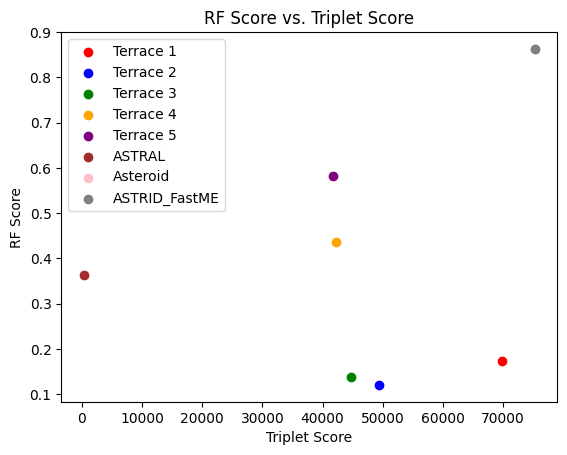

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# rf_distances = [0.172103, 0.120139, 0.138132,0.435345,0.583060, astral_rf_score, asteroid_rf_score,astrid_fastme_rf_score]
# # Plot RF distances
# methods = ['Terrace 1', 'Astral', 'Asteroid','ASTRID FastME']
# plt.bar(methods, rf_distances)
# #plt.xlabel('Inferred Methods')
# plt.ylabel('RF Distance')
# plt.title('RF Distance of Inferred Trees')
# plt.show()

data = {
    'Category': ['Terrace 1','Terrace 2','Terrace 3','Terrace 4','Terrace 5','ASTRAL','Asteroid','ASTRID_FastME'],
    'Triplet Score': [69736,49407,44691,42188,41808,344,75237,75237],
    'RF Distance': [0.172103, 0.120139, 0.138132,0.435345,0.583060, astral_rf_score, asteroid_rf_score,astrid_fastme_rf_score]
}
df = pd.DataFrame(data)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

# scatter plot
fig, ax = plt.subplots()
for i, cat in enumerate(df['Category']):
    ax.scatter(df.loc[df['Category'] == cat, 'Triplet Score'], df.loc[df['Category'] == cat, 'RF Distance'],
               color=colors[i], label=cat)


ax.legend()

plt.xlabel('Triplet Score')
plt.ylabel('RF Score')
plt.title('RF Score vs. Triplet Score')

# Show plot
plt.show()

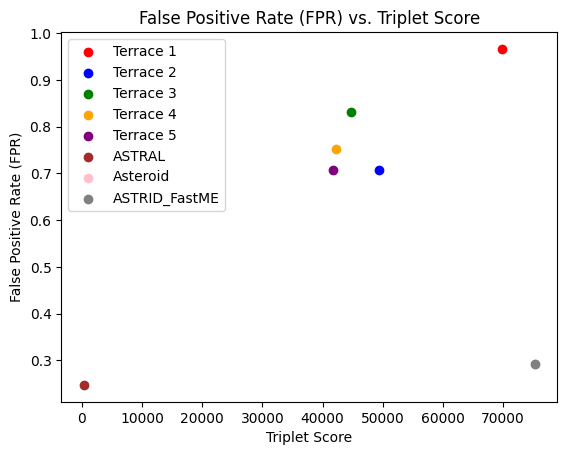

In [36]:
data = {
    'Category': ['Terrace 1','Terrace 2','Terrace 3','Terrace 4','Terrace 5','ASTRAL','Asteroid','ASTRID_FastME'],
    'Triplet Score': [69736,49407,44691,42188,41808,344,75237,75237],
    'False Positive Rate': [0.966292,0.707865,0.831461,0.752809,0.707865, fpr_score_astral, fpr_score_asteroid,fpr_score_astrid_fastme]
}
df = pd.DataFrame(data)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

# scatter plot
fig, ax = plt.subplots()
for i, cat in enumerate(df['Category']):
    ax.scatter(df.loc[df['Category'] == cat, 'Triplet Score'], df.loc[df['Category'] == cat, 'False Positive Rate'],
               color=colors[i], label=cat)

ax.legend()

plt.xlabel('Triplet Score')
plt.ylabel('False Positive Rate (FPR)')
plt.title('False Positive Rate (FPR) vs. Triplet Score')


plt.show()

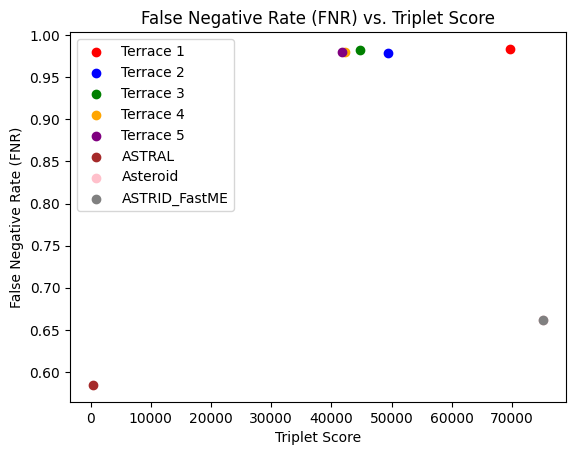

In [37]:
data = {
    'Category': ['Terrace 1','Terrace 2','Terrace 3','Terrace 4','Terrace 5','ASTRAL','Asteroid','ASTRID_FastME'],
    'Triplet Score': [69736,49407,44691,42188,41808,344,75237,75237],
    'False Negative Rate': [0.983607,0.979167,0.982143,0.980392,0.979592, fnr_score_astral, fnr_score_asteroid,fnr_score_astrid_fastme]
}
df = pd.DataFrame(data)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

fig, ax = plt.subplots()
for i, cat in enumerate(df['Category']):
    ax.scatter(df.loc[df['Category'] == cat, 'Triplet Score'], df.loc[df['Category'] == cat, 'False Negative Rate'],
               color=colors[i], label=cat)

ax.legend()

plt.xlabel('Triplet Score')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate (FNR) vs. Triplet Score')

# Show plot
plt.show()

Dataset 2: 15-taxon

a) 100gene-100bp

Inferring Species Trees

In [38]:
import os

gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\100gene-100bp"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\100gene-100bp_inferred_ST"

def process_gene_tree_batch_files_100g_100bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_100gene-100bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_100g_100bp(input_file_path, output_file_path)


True ST

In [39]:
st_file_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\true-species.out.tree"
with open(st_file_path, "r") as species_file:
    st_content_15_taxon = species_file.read()
    st_taxa_names_15_taxon = taxa_names_without_underscores(st_content_15_taxon)

    #print(st_taxa_names)

st_triplet_list_15_taxon = triplet_list(st_taxa_names_15_taxon)
true_st_15_taxon= Tree(st_content_15_taxon)
print(st_taxa_names_15_taxon)

['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


In [40]:


from ete3 import Tree

def get_bipartitions(tree):
    #unique bipartitions of a tree
    bipartitions = set()
    for node in tree.traverse():
        if not node.is_leaf():
            leaves = frozenset(leaf.name for leaf in node.iter_leaves())
            bipartitions.add(leaves)
    return bipartitions

def calculate_fnr_ds(true_tree_str, inferred_tree_str):

    #fnr between two trees in Newick format.

    true_tree = Tree(true_tree_str)
    inferred_tree = Tree(inferred_tree_str)

    true_bipartitions = get_bipartitions(true_tree)
    inferred_bipartitions = get_bipartitions(inferred_tree)

    fn_bipartitions = true_bipartitions - inferred_bipartitions
    fnr = len(fn_bipartitions) / len(true_bipartitions) if len(true_bipartitions) > 0 else 0

    return fnr

def calculate_fpr_ds(true_tree_str, inferred_tree_str):
    #FPR between two trees in Newick format.
   
    true_tree = Tree(true_tree_str)
    inferred_tree = Tree(inferred_tree_str)

    true_bipartitions = get_bipartitions(true_tree)
    inferred_bipartitions = get_bipartitions(inferred_tree)

    fp_bipartitions = inferred_bipartitions - true_bipartitions
    fpr = len(fp_bipartitions) / len(inferred_bipartitions) if len(inferred_bipartitions) > 0 else 0

    return fpr

In [41]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\100gene-100bp_inferred_ST"


#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):

    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])
    #ST file reading
    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()

    species_names = taxa_names_without_underscores(species_tree_content)
    #print(species_names)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_15_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_15_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_15_taxon,inferred_st)
    
    #fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_15_taxon,species_tree_content)
    st_tree_obj = Tree(st_content_15_taxon)
    species_tree_obj = Tree(species_tree_content)

    # fpr_score_per_species_tree= compare_trees(st_tree_obj,species_tree_obj)
    fpr_score_per_species_tree= calculate_fpr_ds(st_content_15_taxon,species_tree_content)
    fnr_score_per_species_tree = calculate_fnr_ds(st_content_15_taxon,species_tree_content)


    #Results
    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)
    

results_df_100gt_100bp = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                    'FN Rate': fnr_list })


print(results_df_100gt_100bp)

      Species_Tree_No.  Matching TC  Triplet Score  RF Score   FP Rate  \
0  st_10_100gene-100bp           14             79  0.637097  0.928571   
1  st_1__100gene-100bp           14             76  0.664179  0.928571   
2  st_2__100gene-100bp           14            169  0.683099  0.928571   
3  st_3__100gene-100bp           14             68  0.664179  0.928571   
4  st_4__100gene-100bp           14             80  0.683099  0.785714   
5  st_5__100gene-100bp           14             26  0.659091  0.928571   
6  st_6__100gene-100bp           14            112  0.673913  0.857143   
7  st_7__100gene-100bp           14             51  0.631148  0.928571   
8  st_8__100gene-100bp           14             31  0.648438  0.928571   
9  st_9__100gene-100bp           14             25  0.664179  0.928571   

    FN Rate  
0  0.928571  
1  0.928571  
2  0.928571  
3  0.928571  
4  0.785714  
5  0.928571  
6  0.857143  
7  0.928571  
8  0.928571  
9  0.928571  


In [42]:
print(triplet_score_list.count(max(triplet_score_list)))

1


In [43]:
# results_df_100gt_100bp = results_df_100gt_100bp.sort_values(by='Triplet Score', ascending=False)

# results_df_100gt_100bp['Terrace_Num'] = 'Terrace_Num' + (results_df_100gt_100bp['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

# results_df_100gt_100bp

b) 100gene-1000bp

In [44]:
import os

gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\100gene-1000bp"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\100gene-1000bp_inferred_ST"

def process_gene_tree_batch_files_100g_1000bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_100g_1000bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_100g_1000bp(input_file_path, output_file_path)

In [45]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\100gene-1000bp_inferred_ST"

#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):
    
    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])

    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()
    
    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_15_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_15_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_15_taxon,inferred_st)
    
    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_15_taxon,species_tree_content)


    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)
    

results_df_100gt_1000bp = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                    'FN Rate': fnr_list })

print(results_df_100gt_1000bp)

    Species_Tree_No.  Matching TC  Triplet Score  RF Score   FP Rate   FN Rate
0  st_10_100g_1000bp           14             44  0.664179  0.928571  0.928571
1  st_1__100g_1000bp           14             26  0.687500  0.857143  0.857143
2  st_2__100g_1000bp           14              4  0.691781  0.857143  0.857143
3  st_3__100g_1000bp           14             24  0.637097  0.857143  0.857143
4  st_4__100g_1000bp           14             33  0.703947  0.857143  0.857143
5  st_5__100g_1000bp           14              8  0.683099  0.785714  0.785714
6  st_6__100g_1000bp           14             23  0.664179  0.928571  0.928571
7  st_7__100g_1000bp           14              6  0.659091  0.928571  0.928571
8  st_8__100g_1000bp           14            108  0.678571  0.928571  0.928571
9  st_9__100g_1000bp           14             45  0.678571  0.857143  0.857143


In [46]:
print(max(triplet_score_list))
print(triplet_score_list.count(max(triplet_score_list)))

108
1


In [47]:
# results_df_100gt_1000bp = results_df_100gt_1000bp.sort_values(by='Triplet Score', ascending=False)

# results_df_100gt_1000bp['Terrace_Num'] = 'Terrace_Num' + (results_df_100gt_1000bp['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

# results_df_100gt_1000bp

c) 1000gene-100bp

In [48]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\1000gene-100bp"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\1000gene-100bp_inferred_ST"

def process_gene_tree_batch_files_1000g_100bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_1000g_100bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_1000g_100bp(input_file_path, output_file_path)

In [49]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\1000gene-100bp_inferred_ST"


#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []


for file_name in os.listdir(folder_path):
   
    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])
    
    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()
    
 
    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_15_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_15_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_15_taxon,inferred_st)

    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_15_taxon,species_tree_content)
    


    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)


results_df_1000gt_100bp = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                    'FN Rate': fnr_list })


print(results_df_1000gt_100bp)

    Species_Tree_No.  Matching TC  Triplet Score  RF Score   FP Rate   FN Rate
0  st_10_1000g_100bp           14             77  0.648438  0.928571  0.928571
1  st_1__1000g_100bp           14             47  0.659091  0.928571  0.928571
2  st_2__1000g_100bp           14             27  0.678571  0.928571  0.928571
3  st_3__1000g_100bp           14             98  0.642857  0.928571  0.928571
4  st_4__1000g_100bp           14             64  0.683099  0.785714  0.785714
5  st_5__1000g_100bp           14             29  0.669118  0.928571  0.928571
6  st_6__1000g_100bp           14            104  0.673913  0.857143  0.857143
7  st_7__1000g_100bp           14             53  0.648438  0.928571  0.928571
8  st_8__1000g_100bp           14             33  0.648438  0.928571  0.928571
9  st_9__1000g_100bp           14             49  0.653846  0.928571  0.928571


In [50]:
print(max(triplet_score_list))
print(triplet_score_list.count(max(triplet_score_list)))

104
1


In [51]:

# results_df_1000gt_100bp = results_df_1000gt_100bp.sort_values(by='Triplet Score', ascending=False)

# results_df_1000gt_100bp['Terrace_Num'] = 'Terrace_Num' + (results_df_1000gt_100bp['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

# results_df_1000gt_100bp

d) 1000gene-1000bp

In [52]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\1000gene-1000bp"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\1000gene-1000bp_inferred_ST"

def process_gene_tree_batch_files_1000g_1000bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_1000g_1000bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_1000g_1000bp(input_file_path, output_file_path)

In [53]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\15-taxon\1000gene-1000bp_inferred_ST"


#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):
  
    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])

    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()
    

    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_15_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_15_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_15_taxon,inferred_st)
    
    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_15_taxon,species_tree_content)


    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)

results_df_1000gt_1000bp = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                    'FN Rate': fnr_list })

print(results_df_1000gt_1000bp)

     Species_Tree_No.  Matching TC  Triplet Score  RF Score   FP Rate  \
0  st_10_1000g_1000bp           14             36  0.664179  0.928571   
1  st_1__1000g_1000bp           14             26  0.687500  0.857143   
2  st_2__1000g_1000bp           14              6  0.691781  0.857143   
3  st_3__1000g_1000bp           14             14  0.637097  0.857143   
4  st_4__1000g_1000bp           14             30  0.703947  0.857143   
5  st_5__1000g_1000bp           14             13  0.683099  0.785714   
6  st_6__1000g_1000bp           14             19  0.664179  0.928571   
7  st_7__1000g_1000bp           14              7  0.659091  0.928571   
8  st_8__1000g_1000bp           14             99  0.678571  0.928571   
9  st_9__1000g_1000bp           14             65  0.678571  0.857143   

    FN Rate  
0  0.928571  
1  0.857143  
2  0.857143  
3  0.857143  
4  0.857143  
5  0.785714  
6  0.928571  
7  0.928571  
8  0.928571  
9  0.857143  


In [54]:
print(max(triplet_score_list))
print(triplet_score_list.count(max(triplet_score_list)))

99
1


In [55]:
# Sort the DataFrame by 'triplet_score' in descending order
# results_df_1000gt_1000bp = results_df_1000gt_1000bp.sort_values(by='Triplet Score', ascending=False)

# # Assign ranks to each triplet score
# results_df_1000gt_1000bp['Terrace_Num'] = 'Terrace_Num' + (results_df_1000gt_1000bp['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

# results_df_1000gt_1000bp

Concatenating all dataframes into one

In [56]:
dfs = [results_df_100gt_100bp, results_df_1000gt_1000bp,results_df_1000gt_100bp,results_df_1000gt_1000bp]

# concatenate the df in the list
taxon_15_df = pd.concat(dfs, ignore_index=True)
taxon_15_df

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_100gene-100bp,14,79,0.637097,0.928571,0.928571
1,st_1__100gene-100bp,14,76,0.664179,0.928571,0.928571
2,st_2__100gene-100bp,14,169,0.683099,0.928571,0.928571
3,st_3__100gene-100bp,14,68,0.664179,0.928571,0.928571
4,st_4__100gene-100bp,14,80,0.683099,0.785714,0.785714
5,st_5__100gene-100bp,14,26,0.659091,0.928571,0.928571
6,st_6__100gene-100bp,14,112,0.673913,0.857143,0.857143
7,st_7__100gene-100bp,14,51,0.631148,0.928571,0.928571
8,st_8__100gene-100bp,14,31,0.648438,0.928571,0.928571
9,st_9__100gene-100bp,14,25,0.664179,0.928571,0.928571


In [57]:
taxon_15_df = taxon_15_df.sort_values(by='Triplet Score', ascending=False)

taxon_15_df['Terrace Number'] = (taxon_15_df['Triplet Score']
                                             .rank(method='dense', ascending=False)
                                             .astype(int)
                                             .astype(str))

taxon_15_df

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate,Terrace Number
2,st_2__100gene-100bp,14,169,0.683099,0.928571,0.928571,1
6,st_6__100gene-100bp,14,112,0.673913,0.857143,0.857143,2
26,st_6__1000g_100bp,14,104,0.673913,0.857143,0.857143,3
18,st_8__1000g_1000bp,14,99,0.678571,0.928571,0.928571,4
38,st_8__1000g_1000bp,14,99,0.678571,0.928571,0.928571,4
23,st_3__1000g_100bp,14,98,0.642857,0.928571,0.928571,5
4,st_4__100gene-100bp,14,80,0.683099,0.785714,0.785714,6
0,st_10_100gene-100bp,14,79,0.637097,0.928571,0.928571,7
20,st_10_1000g_100bp,14,77,0.648438,0.928571,0.928571,8
1,st_1__100gene-100bp,14,76,0.664179,0.928571,0.928571,9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


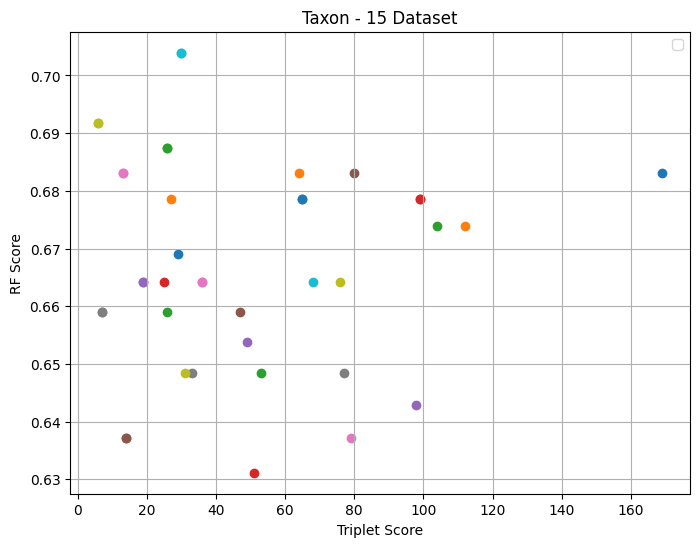

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

x = taxon_15_df['RF Score']
y = taxon_15_df['Triplet Score']
group_numbers = taxon_15_df['Terrace Number']

plt.figure(figsize=(8, 6))
for group_number in group_numbers.unique():
    group_x = x[group_numbers == group_number]
    group_y = y[group_numbers == group_number]
    plt.scatter(group_y, group_x, 
                #label=f'Group {group_number}'
                )

plt.xlabel('Triplet Score')
plt.ylabel('RF Score')
plt.title('Taxon - 15 Dataset')
plt.legend()
plt.grid(True)
plt.show()

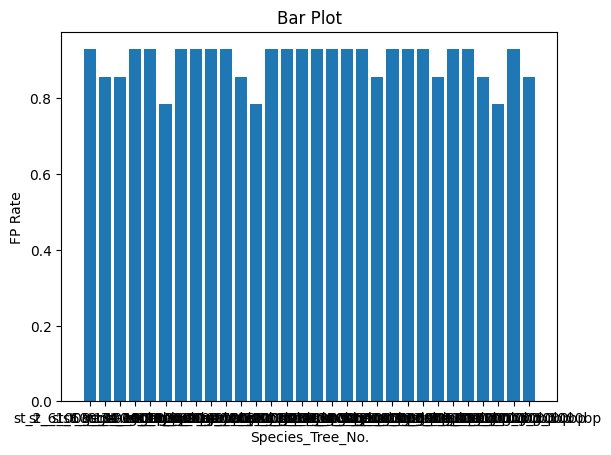

In [59]:

plt.bar(taxon_15_df['Species_Tree_No.'], taxon_15_df['FP Rate'])


plt.xlabel('Species_Tree_No.')
plt.ylabel('FP Rate')
plt.title('Bar Plot')


plt.show()

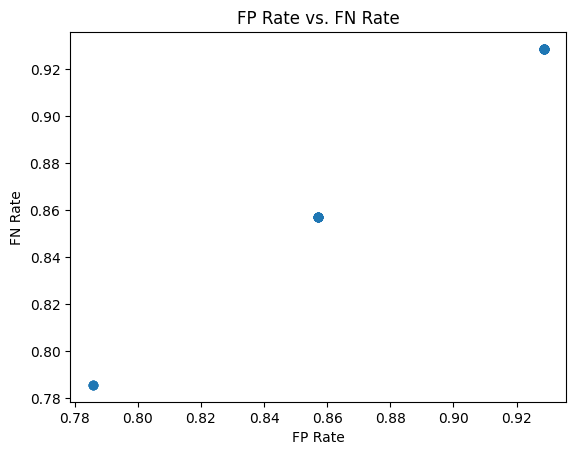

In [60]:
plt.scatter(taxon_15_df['FP Rate'], taxon_15_df['FN Rate'])

plt.xlabel('FP Rate')
plt.ylabel('FN Rate')
plt.title('FP Rate vs. FN Rate')


plt.show()

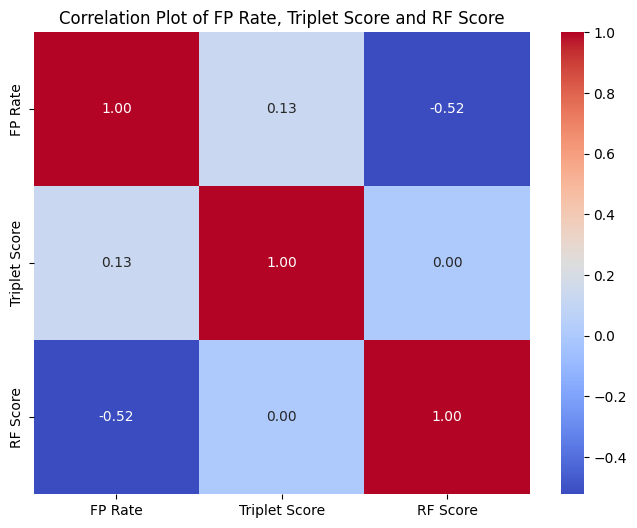

In [61]:
import seaborn as sns

selected_columns = ['FP Rate', 'Triplet Score','RF Score']
subset_df = taxon_15_df[selected_columns]

#correlation matrix
correlation_matrix = subset_df.corr()

# correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of FP Rate, Triplet Score and RF Score')
plt.show()

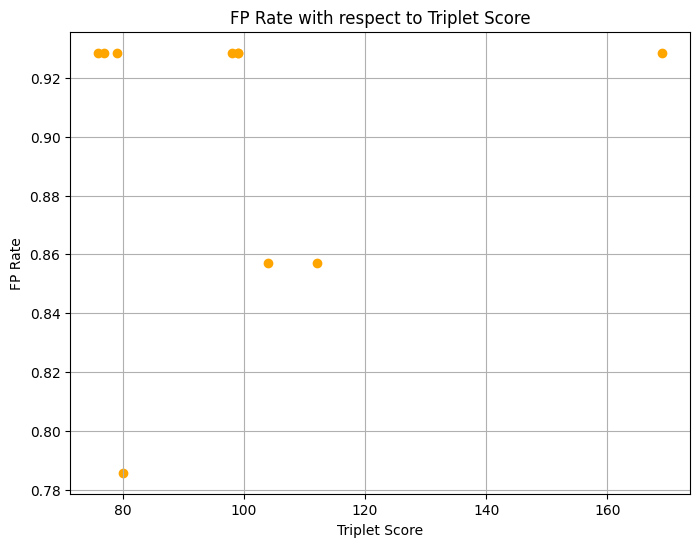

In [62]:
column1_data = taxon_15_df['FP Rate'].iloc[:10]
column2_data = taxon_15_df['Triplet Score'].iloc[:10]

# plotting the data points
plt.figure(figsize=(8, 6))
plt.scatter(column2_data, column1_data, color='orange')
plt.xlabel('Triplet Score')
plt.ylabel('FP Rate')
plt.title('FP Rate with respect to Triplet Score')
plt.grid(True)
plt.show()

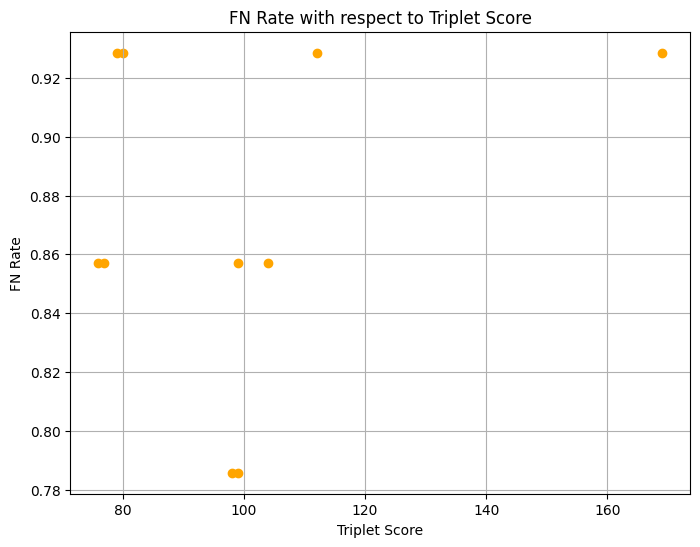

In [63]:
column1_data = taxon_15_df['FN Rate'].iloc[-10:]
column2_data = taxon_15_df['Triplet Score'].iloc[:10]

#plotting the data points
plt.figure(figsize=(8, 6))
plt.scatter(column2_data, column1_data, color='orange')
plt.xlabel('Triplet Score')
plt.ylabel('FN Rate')
plt.title('FN Rate with respect to Triplet Score')
plt.grid(True)
plt.show()

Taxa - 17 Dataset

True Species Tree

In [64]:
st_file_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\species-tree\true-species.out.tree"
with open(st_file_path, "r") as species_file:
    st_content_17_taxon = species_file.read()
    st_taxa_names_17_taxon = taxa_names_without_underscores(st_content_17_taxon)

    #print(st_taxa_names)

st_triplet_list_17_taxon = triplet_list(st_taxa_names_17_taxon)
true_st_17_taxon= Tree(st_content_17_taxon)
print(len(st_taxa_names_17_taxon))

17


a) noscale.25g.500b

In [65]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.25g.500b"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.25g.500b_inferred_st"

def process_gene_tree_batch_files_25g_500bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_25g_500bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_25g_500bp(input_file_path, output_file_path)


In [66]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.25g.500b_inferred_st"

#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):
    
    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])
    
    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()
 
    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_17_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_17_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_17_taxon,inferred_st)

    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_17_taxon,species_tree_content)
    

    #results
    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)
    

results_df_25g_500b = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                     'FN Rate': fnr_list })

print(results_df_25g_500b)

   Species_Tree_No.  Matching TC  Triplet Score  RF Score   FP Rate   FN Rate
0   st_10_25g_500bp           17             94  0.736967  0.416667  0.416667
1   st_11_25g_500bp           17             95  0.781496  0.500000  0.500000
2   st_12_25g_500bp           17             30  0.867384  0.388889  0.388889
3   st_13_25g_500bp           17             66  0.774390  0.500000  0.500000
4   st_14_25g_500bp           17            123  0.748869  0.527778  0.527778
5   st_15_25g_500bp           17             24  0.771605  0.527778  0.527778
6   st_16_25g_500bp           17            264  0.743056  0.416667  0.416667
7   st_17_25g_500bp           17             56  0.736967  0.444444  0.444444
8   st_18_25g_500bp           17            111  0.740654  0.500000  0.500000
9   st_19_25g_500bp           17            207  0.776210  0.500000  0.500000
10  st_1__25g_500bp           17            113  0.759740  0.416667  0.416667
11  st_20_25g_500bp           17            379  0.762821  0.500

In [67]:
# sort the df by 'triplet_score' in descending order
# results_df_25g_500b = results_df_25g_500b.sort_values(by='Triplet Score', ascending=False)

# # assign ranks to each triplet score
# results_df_25g_500b['Terrace_Num'] = 'Terrace_Num' + (results_df_25g_500b['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

# results_df_25g_500b

b) noscale.50g.500b

In [68]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.50g.500b"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.50g.500b_inferred_st"

def process_gene_tree_batch_files_50g_500bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_50g_500bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_50g_500bp(input_file_path, output_file_path)

In [69]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.50g.500b_inferred_st"


#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):

    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])
 
    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()

    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_17_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_17_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_17_taxon,inferred_st)
    
    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_17_taxon,species_tree_content)


    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)

results_df_50g_500b = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                     'FN Rate': fnr_list })

#print(results_df_50g_500b)

# Sort the DataFrame by 'triplet_score' in descending order
# results_df_50g_500b = results_df_50g_500b.sort_values(by='Triplet Score', ascending=False)

# # Assign ranks to each triplet score
# results_df_50g_500b['Terrace_Num'] = 'Terrace_Num' + (results_df_50g_500b['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

results_df_50g_500b

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_50g_500bp,17,94,0.736967,0.416667,0.416667
1,st_11_50g_500bp,17,95,0.781496,0.500000,0.500000
2,st_12_50g_500bp,17,30,0.867384,0.388889,0.388889
3,st_13_50g_500bp,17,66,0.774390,0.500000,0.500000
4,st_14_50g_500bp,17,123,0.748869,0.527778,0.527778
5,st_15_50g_500bp,17,24,0.771605,0.527778,0.527778
6,st_16_50g_500bp,17,264,0.743056,0.416667,0.416667
7,st_17_50g_500bp,17,56,0.736967,0.444444,0.444444
8,st_18_50g_500bp,17,111,0.740654,0.500000,0.500000
9,st_19_50g_500bp,17,207,0.776210,0.500000,0.500000


c) noscale.100g.500b

In [70]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.100g.500b"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.100g.500b_inferred_st"

def process_gene_tree_batch_files_100g_500bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_100g_500bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_100g_500bp(input_file_path, output_file_path)

In [71]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.100g.500b_inferred_st"


#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):
 
    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])
  
    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()
    
    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_17_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_17_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_17_taxon,inferred_st)

    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_17_taxon,species_tree_content)
    


    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)
    
results_df_100g_500b = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                     'FN Rate': fnr_list })


#print(results_df_50g_500b)


# results_df_100g_500b = results_df_100g_500b.sort_values(by='Triplet Score', ascending=False)

# results_df_100g_500b['Terrace_Num'] = 'Terrace_Num' + (results_df_100g_500b['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

results_df_100g_500b

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_100g_500bp,17,94,0.736967,0.416667,0.416667
1,st_11_100g_500bp,17,95,0.781496,0.500000,0.500000
2,st_12_100g_500bp,17,30,0.867384,0.388889,0.388889
3,st_13_100g_500bp,17,66,0.774390,0.500000,0.500000
4,st_14_100g_500bp,17,123,0.748869,0.527778,0.527778
5,st_15_100g_500bp,17,24,0.771605,0.527778,0.527778
6,st_16_100g_500bp,17,264,0.743056,0.416667,0.416667
7,st_17_100g_500bp,17,56,0.736967,0.444444,0.444444
8,st_18_100g_500bp,17,111,0.740654,0.500000,0.500000
9,st_19_100g_500bp,17,207,0.776210,0.500000,0.500000


d) noscale.200g.250b

In [72]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.250b"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.250b_inferred_st"

def process_gene_tree_batch_files_200g_250bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_200g_250bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_200g_250bp(input_file_path, output_file_path)

In [73]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.250b_inferred_st"


#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):

    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])

    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()

    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_17_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_17_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_17_taxon,inferred_st)
    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_17_taxon,species_tree_content)

    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)

results_df_200g_250b = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                     'FN Rate': fnr_list })

#print(results_df_50g_500b)

# results_df_200g_250b = results_df_200g_250b.sort_values(by='Triplet Score', ascending=False)

# results_df_200g_250b['Terrace_Num'] = 'Terrace_Num' + (results_df_200g_250b['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

results_df_200g_250b

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_200g_250bp,17,371,0.757642,0.472222,0.472222
1,st_11_200g_250bp,17,165,0.777108,0.555556,0.555556
2,st_12_200g_250bp,17,33,0.783203,0.583333,0.583333
3,st_13_200g_250bp,17,129,0.782353,0.638889,0.638889
4,st_14_200g_250bp,17,34,0.774390,0.527778,0.527778
5,st_15_200g_250bp,17,153,0.782353,0.611111,0.611111
6,st_16_200g_250bp,17,35,0.755507,0.583333,0.583333
7,st_17_200g_250bp,17,42,0.755507,0.500000,0.500000
8,st_18_200g_250bp,17,113,0.757642,0.555556,0.555556
9,st_19_200g_250bp,17,180,0.778884,0.583333,0.583333


e) noscale.200g.500b

In [74]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.500b"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.500b_inferred_st"

def process_gene_tree_batch_files_200g_500bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_200g_500bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_200g_500bp(input_file_path, output_file_path)

In [75]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.500b_inferred_st"


#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):

    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])
  
    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()

    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_17_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_17_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_17_taxon,inferred_st)
    
    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_17_taxon,species_tree_content)

    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)
    


results_df_200g_500b = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                     'FN Rate': fnr_list })

#print(results_df_50g_500b)

# results_df_200g_500b = results_df_200g_500b.sort_values(by='Triplet Score', ascending=False)

# results_df_200g_500b['Terrace_Num'] = 'Terrace_Num' + (results_df_200g_500b['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

results_df_200g_500b

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_200g_500bp,17,94,0.736967,0.416667,0.416667
1,st_11_200g_500bp,17,95,0.781496,0.500000,0.500000
2,st_12_200g_500bp,17,30,0.786538,0.416667,0.416667
3,st_13_200g_500bp,17,66,0.774390,0.500000,0.500000
4,st_14_200g_500bp,17,123,0.748869,0.527778,0.527778
5,st_15_200g_500bp,17,24,0.771605,0.527778,0.527778
6,st_16_200g_500bp,17,264,0.743056,0.416667,0.416667
7,st_17_200g_500bp,17,56,0.736967,0.444444,0.444444
8,st_18_200g_500bp,17,111,0.740654,0.500000,0.500000
9,st_19_200g_500bp,17,207,0.776210,0.500000,0.500000


f) noscale.200g.1000b

In [76]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.1000b"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.1000b_inferred_st"

def process_gene_tree_batch_files_200g_1000bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_200g_1000bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_200g_1000bp(input_file_path, output_file_path)

In [77]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.1000b_inferred_st"

#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):

    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])

    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()
    

    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_17_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_17_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_17_taxon,inferred_st)
    
    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_17_taxon,species_tree_content)

    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)

    
results_df_200g_1000b = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                     'FN Rate': fnr_list })

#print(results_df_50g_500b)

# results_df_200g_1000b = results_df_200g_1000b.sort_values(by='Triplet Score', ascending=False)

# results_df_200g_1000b['Terrace_Num'] = 'Terrace_Num' + (results_df_200g_1000b['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

results_df_200g_1000b

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_200g_1000bp,17,88,0.736967,0.388889,0.388889
1,st_11_200g_1000bp,17,102,0.757642,0.444444,0.444444
2,st_12_200g_1000bp,17,30,0.768750,0.416667,0.416667
3,st_13_200g_1000bp,17,118,0.759740,0.444444,0.444444
4,st_14_200g_1000bp,17,70,0.736967,0.444444,0.444444
5,st_15_200g_1000bp,17,146,0.766807,0.472222,0.472222
6,st_16_200g_1000bp,17,106,0.748869,0.333333,0.333333
7,st_17_200g_1000bp,17,71,0.747727,0.305556,0.305556
8,st_18_200g_1000bp,17,177,0.747727,0.527778,0.527778
9,st_19_200g_1000bp,17,35,0.770661,0.416667,0.416667


g) noscale.200g.1500b

In [78]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.1500b"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.1500b_inferred_st"

def process_gene_tree_batch_files_200g_1500bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_200g_1500bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_200g_1500bp(input_file_path, output_file_path)

In [79]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.200g.1500b_inferred_st"

#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):

    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])

    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()
   
    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_17_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_17_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_17_taxon,inferred_st)
    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_17_taxon,species_tree_content)
    


    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)
    


results_df_200g_1500b = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                     'FN Rate': fnr_list })


#print(results_df_50g_500b)

# results_df_200g_1500b = results_df_200g_1500b.sort_values(by='Triplet Score', ascending=False)

# results_df_200g_1500b['Terrace_Num'] = 'Terrace_Num' + (results_df_200g_1500b['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

results_df_200g_1500b

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_200g_1500bp,17,81,0.741860,0.333333,0.333333
1,st_11_200g_1500bp,17,94,0.764831,0.472222,0.472222
2,st_12_200g_1500bp,17,30,0.767782,0.416667,0.416667
3,st_13_200g_1500bp,17,129,0.768750,0.472222,0.472222
4,st_14_200g_1500bp,17,51,0.736967,0.444444,0.444444
5,st_15_200g_1500bp,17,32,0.769710,0.416667,0.416667
6,st_16_200g_1500bp,17,42,0.758696,0.388889,0.388889
7,st_17_200g_1500bp,17,76,0.752232,0.305556,0.305556
8,st_18_200g_1500bp,17,165,0.752232,0.500000,0.500000
9,st_19_200g_1500bp,17,87,0.778000,0.416667,0.416667


h) noscale.400g.500b

In [80]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.400g.500b"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.400g.500b_inferred_st"

def process_gene_tree_batch_files_400g_500bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_400g_500bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_400g_500bp(input_file_path, output_file_path)

In [81]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.400g.500b_inferred_st"

#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []


for file_name in os.listdir(folder_path):

    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])

    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()

    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_17_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_17_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_17_taxon,inferred_st)
    
    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_17_taxon,species_tree_content)


    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)
    

results_df_400g_500b = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                     'FN Rate': fnr_list })

#print(results_df_50g_500b)

# results_df_400g_500b = results_df_400g_500b.sort_values(by='Triplet Score', ascending=False)

# results_df_400g_500b['Terrace_Num'] = 'Terrace_Num' + (results_df_400g_500b['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

results_df_400g_500b

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_400g_500bp,17,81,0.738208,0.500000,0.500000
1,st_11_400g_500bp,17,24,0.758696,0.416667,0.416667
2,st_12_400g_500bp,17,30,0.867384,0.388889,0.388889
3,st_13_400g_500bp,17,140,0.779762,0.500000,0.500000
4,st_14_400g_500bp,17,54,0.741860,0.555556,0.555556
5,st_15_400g_500bp,17,94,0.758696,0.416667,0.416667
6,st_16_400g_500bp,17,264,0.743056,0.416667,0.416667
7,st_17_400g_500bp,17,56,0.736967,0.444444,0.444444
8,st_18_400g_500bp,17,111,0.740654,0.500000,0.500000
9,st_19_400g_500bp,17,207,0.776210,0.500000,0.500000


i) noscale.800g.500b

In [82]:
gene_tree_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.800g.500b"

output_dir = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.800g.500b_inferred_st"

def process_gene_tree_batch_files_800g_500bp(input_file, output_file):
    
    with open(input_file, 'r') as f:
        gene_tree_data = f.readlines()
        #print(gene_tree_data)
    
    inferred_species_tree_batch_wise = infer_species_tree(gene_tree_data) 
    #print(inferred_species_tree_batch_wise.write())

    
    with open(output_file, 'w') as f:
         f.write(inferred_species_tree_batch_wise.write())


#print(os.listdir(gene_tree_dir))
for file_name in os.listdir(gene_tree_dir):
    if file_name.endswith(".tre"):
        
        input_file_path = os.path.join(gene_tree_dir, file_name)
        output_file_path = os.path.join(output_dir, f"st_{file_name[:2]}_800g_500bp")
        #print(f"st_{file_name[:2]}")
        
        
        process_gene_tree_batch_files_800g_500bp(input_file_path, output_file_path)

In [83]:
folder_path = r"D:\BUET\Oct'23\CSE6406(BA)\Code\dataset\taxa-37\gene-tree\noscale.800g.500b_inferred_st"


#results_df = pd.DataFrame(columns=['Species_Tree_No.(inferred)', 'Taxa Names', 'Matching Taxa Count (w.r.t T_ST)','Triplet Score','RF Score(weighted)'])
file_names = []
matching_species_count_list = []
triplet_score_list = []
rf_score_list = []
fpr_list = []
fnr_list = []

for file_name in os.listdir(folder_path):

    if not os.path.isfile(os.path.join(folder_path, file_name)):
        continue

    #print(file_name[:-4])

    with open(os.path.join(folder_path, file_name), 'r') as file:
        species_tree_content = file.read()
    

    species_names = taxa_names_without_underscores(species_tree_content)
    matching_species_count = count_matching_taxa_names(species_names,st_taxa_names_17_taxon)
    triplet_list_per_species_tree = triplet_list(species_names)
    triplet_score_per_species_tree = finding_triplet_score(triplet_list_per_species_tree,st_triplet_list_17_taxon)

    inferred_st = Tree(species_tree_content)
    rf_score_per_species_tree = calculate_weighted_rf(true_st_17_taxon,inferred_st)
    fpr_score_per_species_tree,fnr_score_per_species_tree= calculate_fpr_and_fnr(st_content_17_taxon,species_tree_content)

    


    file_names.append(file_name)
    matching_species_count_list.append(matching_species_count)
    triplet_score_list.append(triplet_score_per_species_tree)
    rf_score_list.append(rf_score_per_species_tree)
    fpr_list.append(fpr_score_per_species_tree)
    fnr_list.append(fnr_score_per_species_tree)
    


results_df_800g_500b = pd.DataFrame({'Species_Tree_No.': file_names,  
                    'Matching TC': matching_species_count_list,
                    'Triplet Score': triplet_score_list,
                    'RF Score':rf_score_list,
                    'FP Rate': fpr_list,
                     'FN Rate': fnr_list })


#print(results_df_50g_500b)

# results_df_800g_500b = results_df_800g_500b.sort_values(by='Triplet Score', ascending=False)

# results_df_800g_500b['Terrace_Num'] = 'Terrace_Num' + (results_df_800g_500b['Triplet Score']
#                                             .rank(method='dense', ascending=False)
#                                             .astype(int)
#                                             .astype(str))

results_df_800g_500b

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_800g_500bp,17,70,0.763830,0.416667,0.416667
1,st_11_800g_500bp,17,43,0.787356,0.527778,0.527778
2,st_12_800g_500bp,17,264,0.743056,0.416667,0.416667
3,st_13_800g_500bp,17,97,0.760776,0.555556,0.555556
4,st_14_800g_500bp,17,379,0.762821,0.500000,0.500000
5,st_15_800g_500bp,17,54,0.741860,0.555556,0.555556
6,st_16_800g_500bp,17,145,0.770661,0.583333,0.583333
7,st_17_800g_500bp,17,72,0.767782,0.444444,0.444444
8,st_18_800g_500bp,17,196,0.750000,0.583333,0.583333
9,st_19_800g_500bp,17,129,0.763830,0.388889,0.388889


Concatenating all dataframes into one

In [84]:
dfs = [results_df_25g_500b,results_df_50g_500b,results_df_100g_500b,results_df_200g_250b,results_df_200g_500b,results_df_200g_1000b,results_df_200g_1500b,
       results_df_400g_500b,results_df_800g_500b]


taxon_17_df = pd.concat(dfs, ignore_index=True)
taxon_17_df

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate
0,st_10_25g_500bp,17,94,0.736967,0.416667,0.416667
1,st_11_25g_500bp,17,95,0.781496,0.500000,0.500000
2,st_12_25g_500bp,17,30,0.867384,0.388889,0.388889
3,st_13_25g_500bp,17,66,0.774390,0.500000,0.500000
4,st_14_25g_500bp,17,123,0.748869,0.527778,0.527778
...,...,...,...,...,...,...
175,st_5__800g_500bp,17,50,0.756579,0.472222,0.472222
176,st_6__800g_500bp,17,38,0.767782,0.388889,0.388889
177,st_7__800g_500bp,17,200,0.754425,0.500000,0.500000
178,st_8__800g_500bp,17,98,0.750000,0.500000,0.500000


In [85]:
taxon_17_df = taxon_17_df.sort_values(by='Triplet Score', ascending=False)

taxon_17_df['Terrace Number'] = (taxon_17_df['Triplet Score']
                                             .rank(method='dense', ascending=False)
                                             .astype(int)
                                             .astype(str))

taxon_17_df.head(28)

,Species_Tree_No.,Matching TC,Triplet Score,RF Score,FP Rate,FN Rate,Terrace Number
31,st_20_50g_500bp,17,379,0.762821,0.500000,0.500000,1
151,st_20_400g_500bp,17,379,0.762821,0.500000,0.500000,1
51,st_20_100g_500bp,17,379,0.762821,0.500000,0.500000,1
91,st_20_200g_500bp,17,379,0.762821,0.500000,0.500000,1
164,st_14_800g_500bp,17,379,0.762821,0.500000,0.500000,1
11,st_20_25g_500bp,17,379,0.762821,0.500000,0.500000,1
71,st_20_200g_250bp,17,378,0.757642,0.583333,0.583333,2
60,st_10_200g_250bp,17,371,0.757642,0.472222,0.472222,3
158,st_8__400g_500bp,17,336,0.754425,0.416667,0.416667,4
86,st_16_200g_500bp,17,264,0.743056,0.416667,0.416667,5


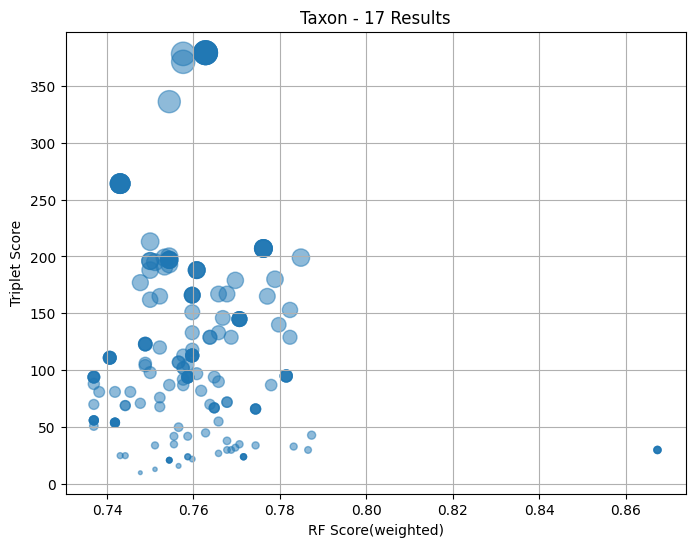

In [86]:
import pandas as pd
import matplotlib.pyplot as plt


dot_sizes = taxon_17_df['Triplet Score'] * taxon_17_df['RF Score']  


plt.figure(figsize=(8, 6))
plt.scatter(taxon_17_df['RF Score'],taxon_17_df['Triplet Score'] , s=dot_sizes, alpha=0.5)


plt.xlabel('RF Score(weighted)')
plt.ylabel('Triplet Score')
plt.title('Taxon - 17 Results')


plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


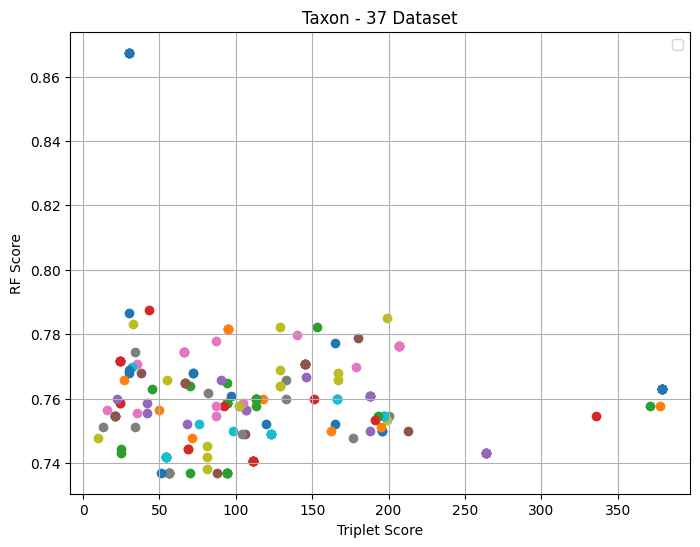

In [87]:

x = taxon_17_df['RF Score']
y = taxon_17_df['Triplet Score']
group_numbers = taxon_17_df['Terrace Number']

# size_column_data = taxon_17_df['Terrace Number'].iloc[:21]
# size_column_data_numeric = pd.to_numeric(size_column_data)


plt.figure(figsize=(8, 6))
for group_number in group_numbers.unique():
    group_x = x[group_numbers == group_number]
    group_y = y[group_numbers == group_number]
    plt.scatter(group_y,group_x 
                #label=f'Group {group_number}'
                )

plt.xlabel('Triplet Score')
plt.ylabel('RF Score')
plt.title('Taxon - 37 Dataset')
plt.legend()
plt.grid(True)
plt.show()

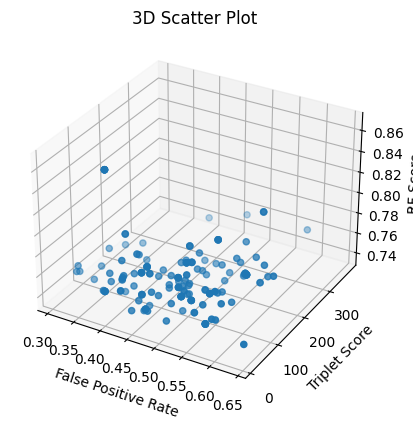

In [88]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(taxon_17_df['FP Rate'], taxon_17_df['Triplet Score'], taxon_17_df['RF Score'])

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('Triplet Score')
ax.set_zlabel('RF Score')
plt.title('3D Scatter Plot')

plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


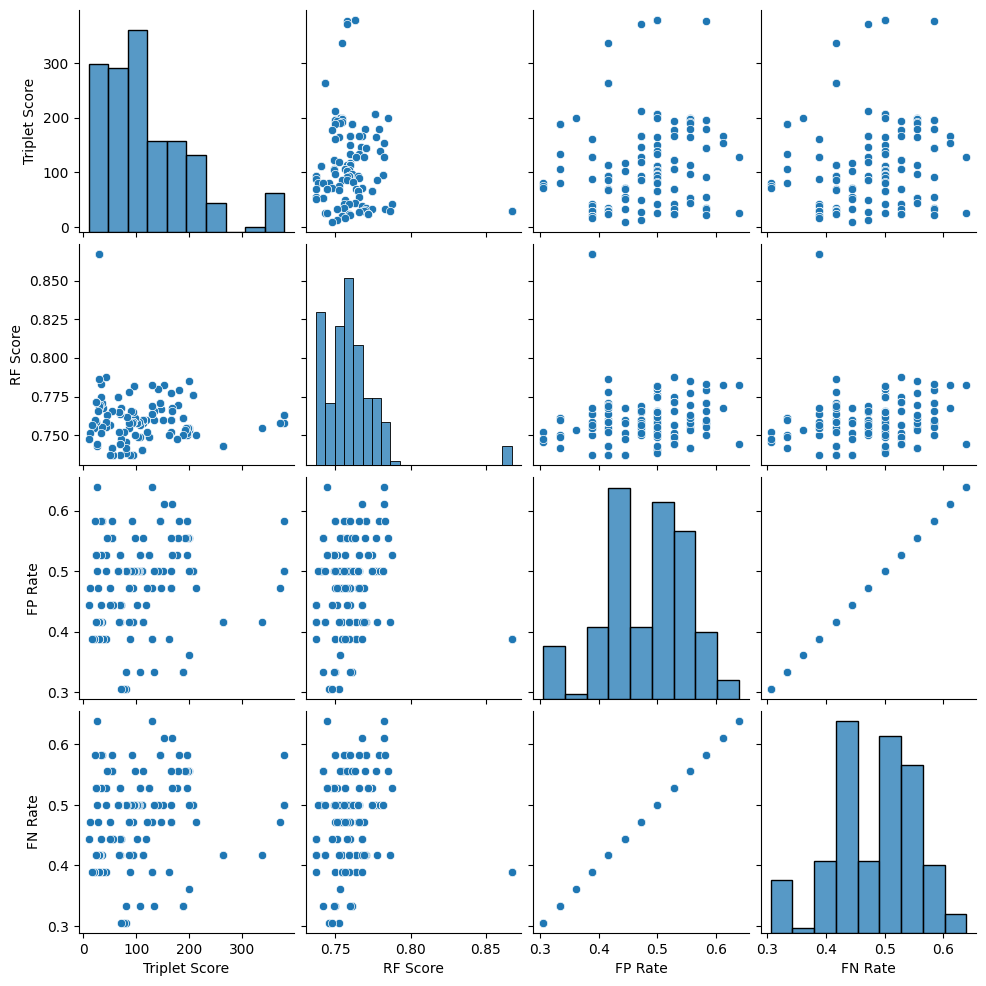

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_to_visualize = ['Triplet Score', 'RF Score', 'FP Rate','FN Rate']

sns.pairplot(taxon_17_df[columns_to_visualize])
plt.show()

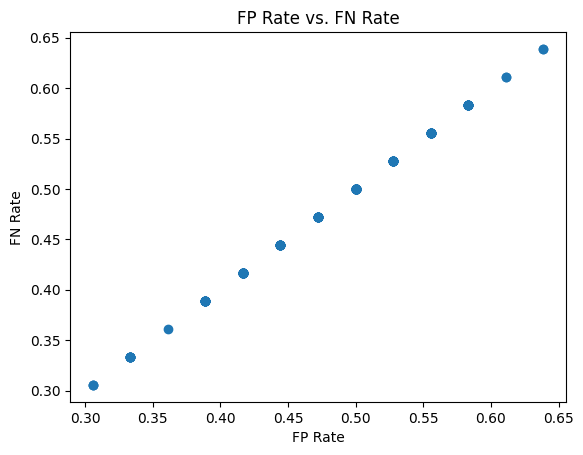

In [90]:
plt.scatter(taxon_17_df['FP Rate'], taxon_17_df['FN Rate'])


plt.xlabel('FP Rate')
plt.ylabel('FN Rate')
plt.title('FP Rate vs. FN Rate')

plt.show()

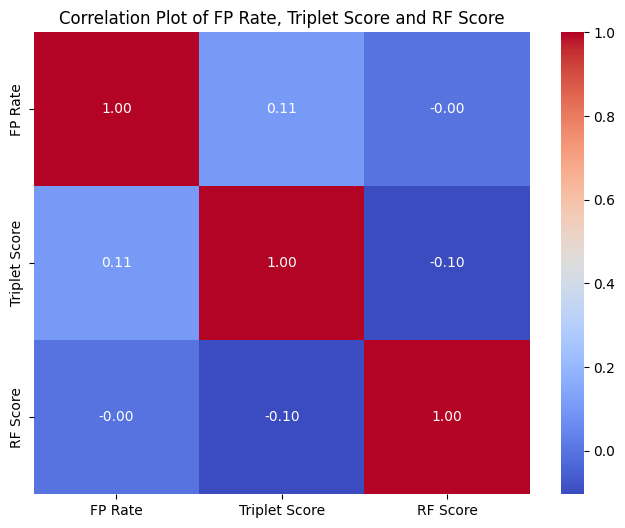

In [91]:
import seaborn as sns

selected_columns = ['FP Rate', 'Triplet Score','RF Score']
subset_df = taxon_17_df[selected_columns]

#correlation matrix
correlation_matrix = subset_df.corr()

#correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of FP Rate, Triplet Score and RF Score')
plt.show()

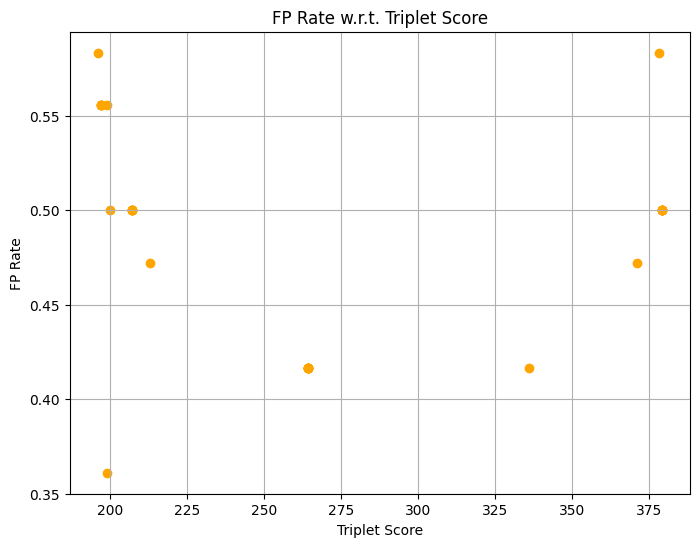

In [92]:
column1_data = taxon_17_df['FP Rate'].iloc[:29]
column2_data = taxon_17_df['Triplet Score'].iloc[:29]


plt.figure(figsize=(8, 6))
plt.scatter(column2_data, column1_data, color='orange')
plt.xlabel('Triplet Score')
plt.ylabel('FP Rate')
plt.title('FP Rate w.r.t. Triplet Score')
plt.grid(True)
plt.show()


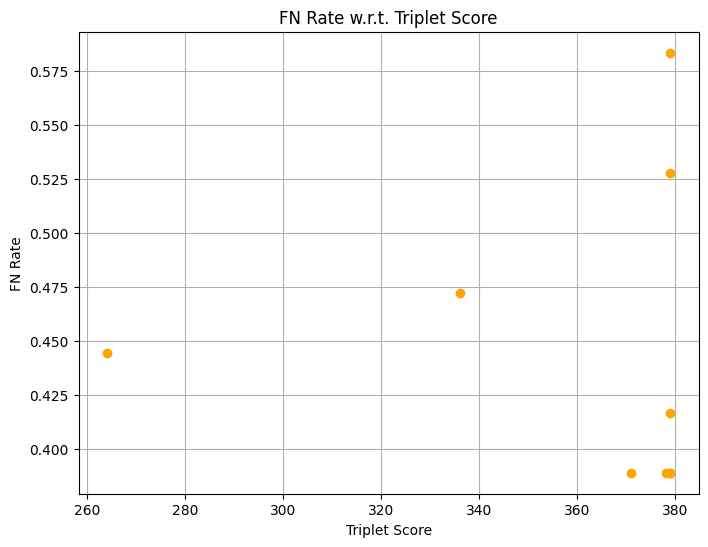

In [93]:
column1_data = taxon_17_df['FN Rate'].iloc[-10:]
column2_data = taxon_17_df['Triplet Score'].iloc[:10]


plt.figure(figsize=(8, 6))
plt.scatter(column2_data, column1_data, color='orange')
plt.xlabel('Triplet Score')
plt.ylabel('FN Rate')
plt.title('FN Rate w.r.t. Triplet Score')
plt.grid(True)
plt.show()

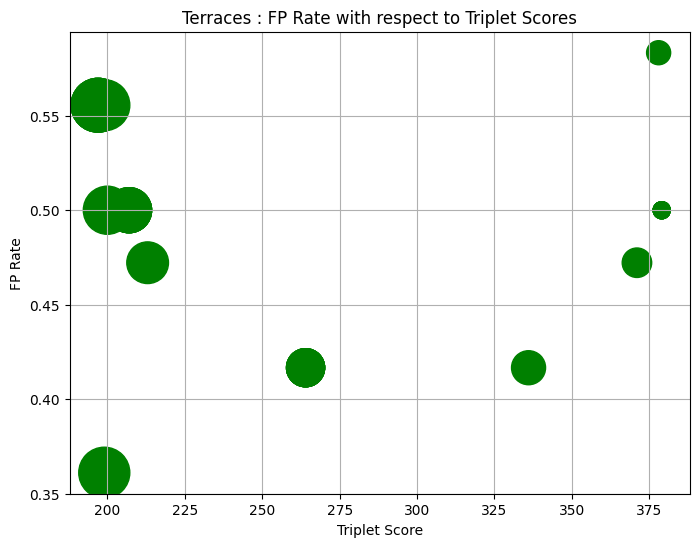

In [94]:
import numpy as np

column1_data = taxon_17_df['Triplet Score'].iloc[:28]
column2_data = taxon_17_df['FP Rate'].iloc[:28]

size_column_data = taxon_17_df['Terrace Number'].iloc[:28]
size_column_data_numeric = pd.to_numeric(size_column_data)

plt.figure(figsize=(8, 6))
plt.scatter(column1_data, column2_data, s=size_column_data_numeric * 150, color='green')
plt.xlabel('Triplet Score')
plt.ylabel('FP Rate')
plt.title('Terraces : FP Rate with respect to Triplet Scores')
plt.grid(True)
plt.show()

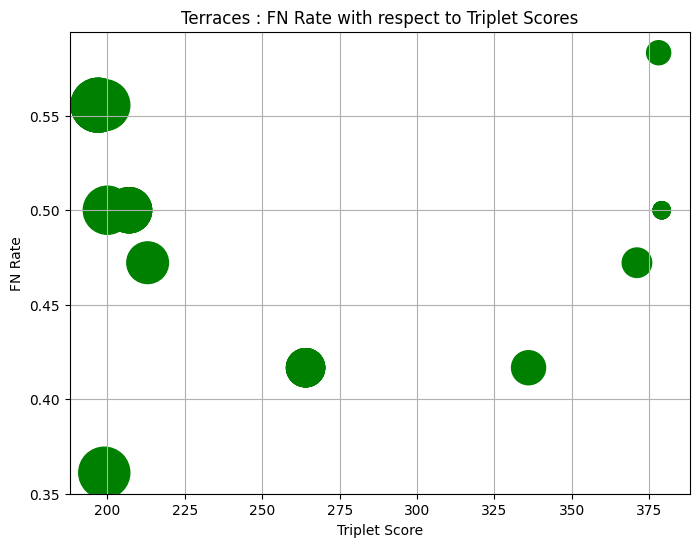

In [95]:

column1_data = taxon_17_df['Triplet Score'].iloc[:28]
column2_data = taxon_17_df['FN Rate'].iloc[:28]

size_column_data = taxon_17_df['Terrace Number'].iloc[:28]
size_column_data_numeric = pd.to_numeric(size_column_data)

plt.figure(figsize=(8, 6))
plt.scatter(column1_data, column2_data, s=size_column_data_numeric * 150, color='green')
plt.xlabel('Triplet Score')
plt.ylabel('FN Rate')
plt.title('Terraces : FN Rate with respect to Triplet Scores')
plt.grid(True)
plt.show()